In [78]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [79]:
imdb_data=tfds.load('imdb_reviews',split='train')

In [80]:
imdb_df=tfds.as_dataframe(imdb_data)

In [81]:
imdb_df.shape

(25000, 2)

In [82]:
imdb_df.head()

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


In [83]:
imdb_df['text'] = imdb_df['text'].str.decode('utf-8')
imdb_df.head()

,label,text
0,0,This was an absolutely terrible movie. Don't b...
1,0,"I have been known to fall asleep during films,..."
2,0,Mann photographs the Alberta Rocky Mountains i...
3,1,This is the kind of film for a snowy Sunday af...
4,1,"As others have mentioned, all the women that g..."


In [84]:
print(imdb_df.iloc[0]['text'])

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


In [85]:
imdb_df['text'][0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [86]:
imdb_sample=imdb_df.sample(frac=0.2, random_state=100)
imdb_sample.shape
# imdb_sample.head()

(5000, 2)

In [87]:
imdb_sample.head(10)

,label,text
20094,1,"""The Godfather"" of television, but aside from ..."
17218,0,"Okay, I've watched this movie twice now, I hav..."
3773,0,"Okay, so the previews to this film only tells ..."
20529,0,Yet ANOTHER movie about a group of less-than-i...
18073,1,This unpretentious Horror film is probably des...
15045,1,"updated January 1st, 2006<br /><br />Parsifal ..."
17053,0,"Although this isn't a ""great film,"" there's so..."
23397,1,Cameron Grant is one of the best directors doi...
10531,0,I do not watch much television and came across...
24690,1,As the first of the TV specials offered on the...


In [88]:
imdb_sample['label'].value_counts()

label
1    2537
0    2463
Name: count, dtype: int64

<Axes: xlabel='label'>

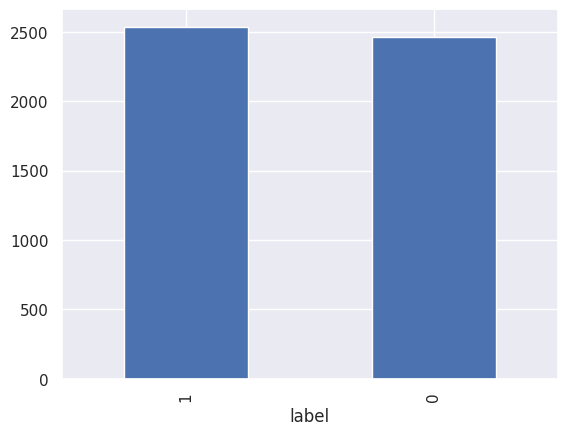

In [89]:
imdb_sample['label'].value_counts().plot(kind='bar')

In [90]:
imdb_sample.isnull().sum()

label    0
text     0
dtype: int64

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
imdb_sample["text_length"]=[len(r.split(" ")) for r in imdb_sample["text"]]

In [93]:
imdb_sample['text_length'].describe()

count    5000.000000
mean      230.975400
std       169.483215
min        11.000000
25%       126.000000
50%       172.000000
75%       283.000000
max      1522.000000
Name: text_length, dtype: float64

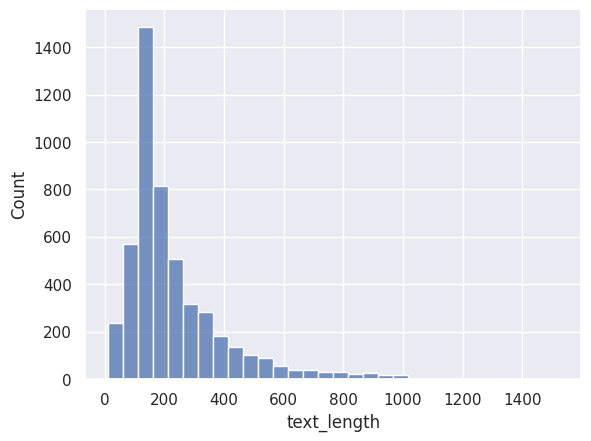

In [94]:
sns.histplot(imdb_sample['text_length'], bins=30)
plt.show()

In [95]:
imdb_sample.groupby('label')[["text_length"]].median()

,text_length
label,
0,170.0
1,174.0


In [96]:
imdb_sample.groupby('label')[["text_length"]].std()

,text_length
label,
0,168.513263
1,170.442863


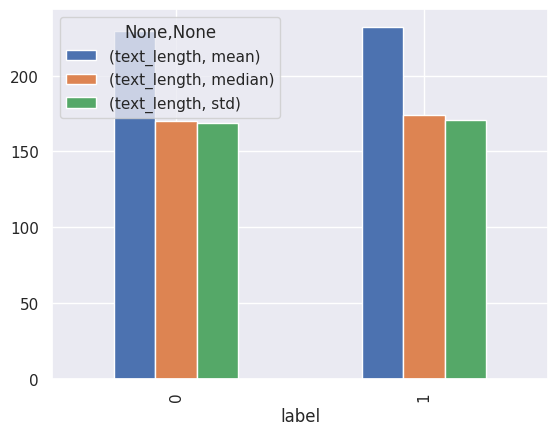

In [97]:
# Generate a bar plot of the mean, median, and standard deviation based on label
imdb_sample.groupby('label')[["text_length"]].agg(['mean', 'median', 'std']).plot(kind='bar')
sns.set_theme()
plt.show()

In [98]:
freq_words=imdb_sample['text'].str.split(expand=True).stack().value_counts()
freq_words_top100=freq_words[:100]
# summary statistics of the freq_words_top100

freq_words_top100.describe()

count      100.000000
mean      5268.970000
std       7879.556446
min       1243.000000
25%       1669.750000
50%       2291.000000
75%       5076.000000
max      56231.000000
Name: count, dtype: float64

In [99]:
import plotly.express as px
import plotly.graph_objects as go

fig=px.treemap(freq_words_top100, path=[freq_words_top100.index])
fig.update_layout(title_text='Most Frequent 100 Words in the Dataset', title_font=dict(size=20))
fig.show()

In [100]:
fig=px.treemap(freq_words_top100, path=[freq_words_top100.index], values='count')
fig.update_layout(title_text='Most Frequent 100 Words in the Dataset', title_font=dict(size=20))
fig.show()


In [101]:
imdb_sample['text']=imdb_sample['text'].str.lower()
# Conversion to lower case helps to standardize the data and ensures that we aren't working with duplicated words.
import re
def punctuation(inputs):
    return re.sub(r'[^\w\s]', ' ', inputs)
# The code above is used to substitute any non-word (^\w) and non-space (^\s) characters with a space ' ' in the 't' column of the df dataframe.
# This effectively removes all punctuation marks from the text.

imdb_sample['text']=imdb_sample['text'].apply(punctuation)
#
imdb_sample.head()

,label,text,text_length
20094,1,the godfather of television but aside from ...,243
17218,0,okay i ve watched this movie twice now i hav...,639
3773,0,okay so the previews to this film only tells ...,173
20529,0,yet another movie about a group of less than i...,384
18073,1,this unpretentious horror film is probably des...,32


In [102]:
# tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(inputs):
    return word_tokenize(inputs)
imdb_sample['text_tokenized']=imdb_sample['text'].apply(tokenization)
# imdb_sample['text_tokenized'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
imdb_sample['text_tokenized'].head()

20094    [the, godfather, of, television, but, aside, f...
17218    [okay, i, ve, watched, this, movie, twice, now...
3773     [okay, so, the, previews, to, this, film, only...
20529    [yet, another, movie, about, a, group, of, les...
18073    [this, unpretentious, horror, film, is, probab...
Name: text_tokenized, dtype: object

In [104]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.add('br')

def stopwords_remove(inputs):
    return [word for word in inputs if word not in stop_words]
#
imdb_sample['text_stop']=imdb_sample['text_tokenized'].apply(stopwords_remove)
imdb_sample['text_stop'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


20094    [godfather, television, aside, acclaim, mobste...
17218    [okay, watched, movie, twice, researched, heav...
3773     [okay, previews, film, tells, rebellious, youn...
20529    [yet, another, movie, group, less, intelligent...
18073    [unpretentious, horror, film, probably, destin...
Name: text_stop, dtype: object

In [105]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=word, pos='v') for word in inputs]
#
imdb_sample['text_lemmatized']=imdb_sample['text_stop'].apply(lemmatization)
imdb_sample['text_lemmatized'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


20094    [godfather, television, aside, acclaim, mobste...
17218    [okay, watch, movie, twice, research, heavily,...
3773     [okay, preview, film, tell, rebellious, young,...
20529    [yet, another, movie, group, less, intelligent...
18073    [unpretentious, horror, film, probably, destin...
Name: text_lemmatized, dtype: object

In [106]:
imdb_sample['final']=imdb_sample['text_lemmatized'].str.join(' ')
freq_words_top100 = imdb_sample['final'].str.split(expand=True).stack().value_counts()
freq_words_top100=freq_words_top100[:100]


In [108]:
fig=px.treemap(freq_words_top100, path=[freq_words_top100.index], values='count')
fig.update_layout(title_text='Frequently Used 100 Words after Text Preprocessing', title_font=dict(size=20))
fig.show()

In [109]:
imdb_sample_0=imdb_sample[imdb_sample['label']==0]



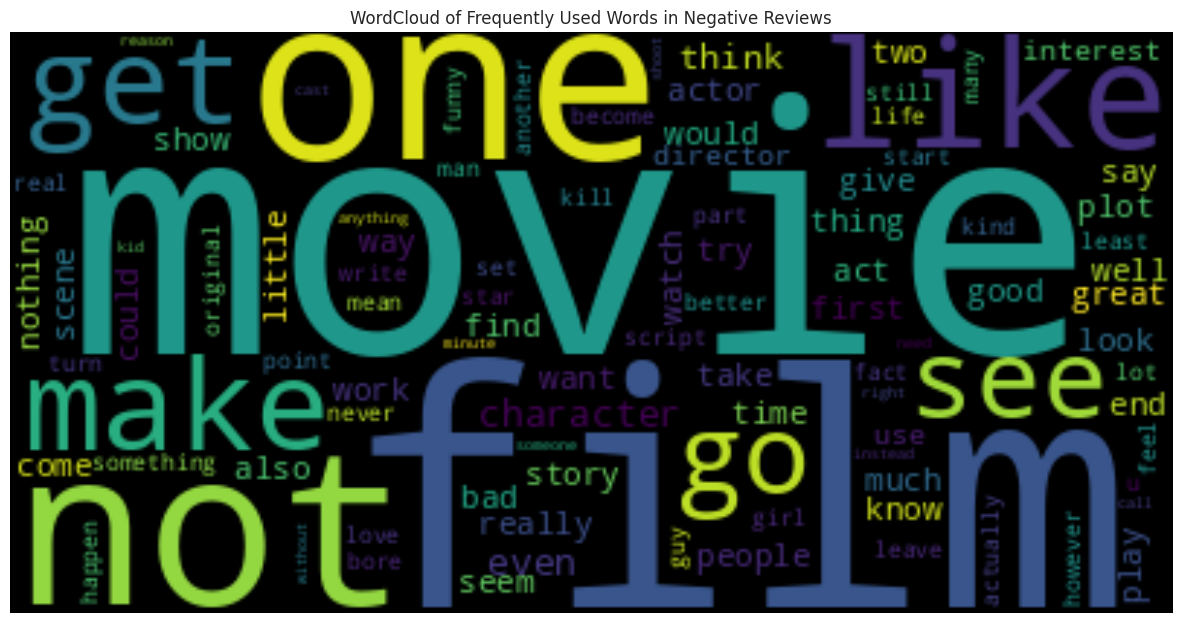

In [110]:
from wordcloud import WordCloud

w=" ".join(imdb_sample_0['final'].tolist())
wc=WordCloud(max_words=100, stopwords=stop_words, random_state=100).generate(w)

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("WordCloud of Frequently Used Words in Negative Reviews")
plt.axis('off')
plt.show()